<a href="https://colab.research.google.com/github/iftesha1/100_Days_Of_Coding_Challenge/blob/main/Day_68_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import IsolationForest

from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Copy of Superstore.xls")

In [4]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df['Sales'].values.reshape(-1, 1)

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [8]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
df['anomaly_score_univariate_sales'] = isolation_forest.decision_function(df['Sales'].values.reshape(-1, 1))
df['outlier_univariate_sales'] = isolation_forest.predict(df['Sales'].values.reshape(-1, 1))

In [9]:
df.sort_values('anomaly_score_univariate_sales')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,-0.103190,-1
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,-0.103190,-1
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,-0.102608,-1
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,-0.101446,-1
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,-0.101446,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,7076,CA-2016-112256,2016-07-23,2016-07-28,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,Mcallen,...,OFF-SU-10001165,Office Supplies,Supplies,Acme Elite Stainless Steel Scissors,13.344,2,0.2,1.0008,0.382296,1
5775,5776,CA-2016-142398,2016-04-12,2016-04-16,Standard Class,BP-11290,Beth Paige,Consumer,United States,Los Angeles,...,OFF-BI-10004826,Office Supplies,Binders,JM Magazine Binder,13.208,1,0.2,4.6228,0.382433,1
1380,1381,CA-2014-126361,2014-08-04,2014-08-09,Second Class,VD-21670,Valerie Dominguez,Consumer,United States,Pleasant Grove,...,OFF-BI-10002852,Office Supplies,Binders,Ibico Standard Transparent Covers,13.184,1,0.2,4.7792,0.382433,1
9711,9712,CA-2014-114251,2014-11-05,2014-11-10,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Philadelphia,...,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,13.194,2,0.7,-8.7960,0.382433,1


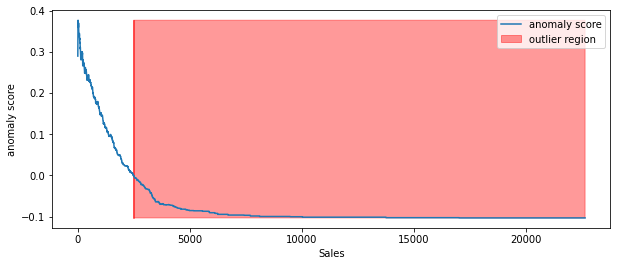

In [10]:
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

In [11]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(df['Profit'].values.reshape(-1, 1))
df['anomaly_score_univariate_profit'] = isolation_forest.decision_function(df['Profit'].values.reshape(-1, 1))
df['outlier_univariate_profit'] = isolation_forest.predict(df['Profit'].values.reshape(-1, 1))

In [12]:
df.sort_values('anomaly_score_univariate_profit')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,-0.103190,-1,-0.072928,-1
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,-0.102608,-1,-0.072928,-1
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,-0.101446,-1,-0.068978,-1
9039,9040,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,-0.100286,-1,-0.068978,-1
4098,4099,CA-2014-116904,2014-09-23,2014-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,...,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,-0.099706,-1,-0.067853,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,4960,CA-2016-166226,2016-11-18,2016-11-22,Standard Class,TC-21535,Tracy Collins,Home Office,United States,Los Angeles,...,Phones,Grandstream GXP2100 Mainstream Business Phone,61.192,1,0.2,6.1192,0.340188,1,0.439882,1
9301,9302,US-2015-163433,2015-04-18,2015-04-22,Second Class,MP-17965,Michael Paige,Corporate,United States,Mcallen,...,Phones,Lunatik TT5L-002 Taktik Strike Impact Protecti...,97.968,2,0.2,6.1230,0.323151,1,0.439882,1
629,630,CA-2017-133431,2017-12-17,2017-12-21,Standard Class,LC-17140,Logan Currie,Consumer,United States,San Francisco,...,Paper,"Ampad Gold Fibre Wirebound Steno Books, 6"" x 9...",13.230,3,0.0,6.0858,0.382270,1,0.439882,1
1400,1401,CA-2016-159212,2016-11-01,2016-11-05,Standard Class,KM-16375,Katherine Murray,Home Office,United States,Salem,...,Phones,"LF Elite 3D Dazzle Designer Hard Case Cover, L...",21.800,2,0.0,6.1040,0.369870,1,0.439882,1


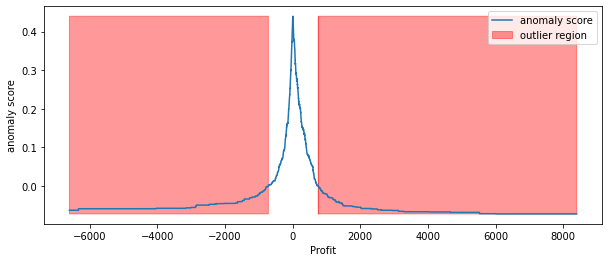

In [13]:
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

In [14]:
df[(df['outlier_univariate_profit']==-1) & (df['outlier_univariate_sales']==-1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,-0.032917,-1,-0.044577,-1
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920,-0.099706,-1,-0.034263,-1
318,319,CA-2014-164973,2014-11-04,2014-11-09,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,...,Machines,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.980,2,0.0,1995.9900,-0.071217,-1,-0.055579,-1
353,354,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,Binders,GBC DocuBind P400 Electric Binding System,4355.168,4,0.2,1415.4296,-0.076838,-1,-0.044577,-1
509,510,CA-2015-145352,2015-03-16,2015-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,...,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,-0.094506,-1,-0.066169,-1
515,516,CA-2017-127432,2017-01-22,2017-01-27,Standard Class,AD-10180,Alan Dominguez,Home Office,United States,Great Falls,...,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770,-0.030250,-1,-0.044577,-1
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,-0.098548,-1,-0.058352,-1
994,995,CA-2014-117639,2014-05-21,2014-05-25,Standard Class,MW-18235,Mitch Willingham,Corporate,United States,Virginia Beach,...,Binders,Fellowes PB300 Plastic Comb Binding Machine,2715.930,7,0.0,1276.4871,-0.013915,-1,-0.039675,-1
1085,1086,US-2016-143819,2016-03-01,2016-03-05,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Yonkers,...,Machines,Ativa V4110MDD Micro-Cut Shredder,4899.930,7,0.0,2400.9657,-0.084202,-1,-0.060021,-1
1454,1455,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Mark Cousins,Corporate,United States,Mobile,...,Machines,Hewlett-Packard Deskjet 3050a All-in-One Color...,3040.000,8,0.0,1459.2000,-0.032383,-1,-0.046766,-1
